In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
## Upload dataset
from google.colab import files
uploaded = files.upload()

Saving titanic-passengers (1).csv to titanic-passengers (1) (5).csv


In [ ]:
df =  pd.read_csv('titanic-passengers (1).csv',  sep=';', engine='python')

In [ ]:
df=df.drop(columns='Cabin')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,S


In [ ]:
df['Embarked'].fillna('S',inplace=True)

In [ ]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [ ]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [ ]:
df['Embarked']=encoder.fit_transform(df['Embarked'])
print(df['Embarked'].value_counts())
df['Sex']=encoder.fit_transform(df['Sex'])
print(df['Sex'].value_counts())
df['Survived']=encoder.fit_transform(df['Survived'])
print(df['Survived'].value_counts())

2    646
0    168
1     77
Name: Embarked, dtype: int64
1    577
0    314
Name: Sex, dtype: int64
0    549
1    342
Name: Survived, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
x=df.drop(["Survived", "Name", "Ticket", "Embarked"], axis=1)
y= df["Survived"]
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20,random_state=10)
tree1 = tree.DecisionTreeClassifier()
tree1.fit(x_train, y_train)   #fitting our model
y_pred=tree1.predict(x_test)   # evaluating our model
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.7877094972067039


In [ ]:
import graphviz
# DOT data
dot_data = tree.export_graphviz(tree1, out_file=None)

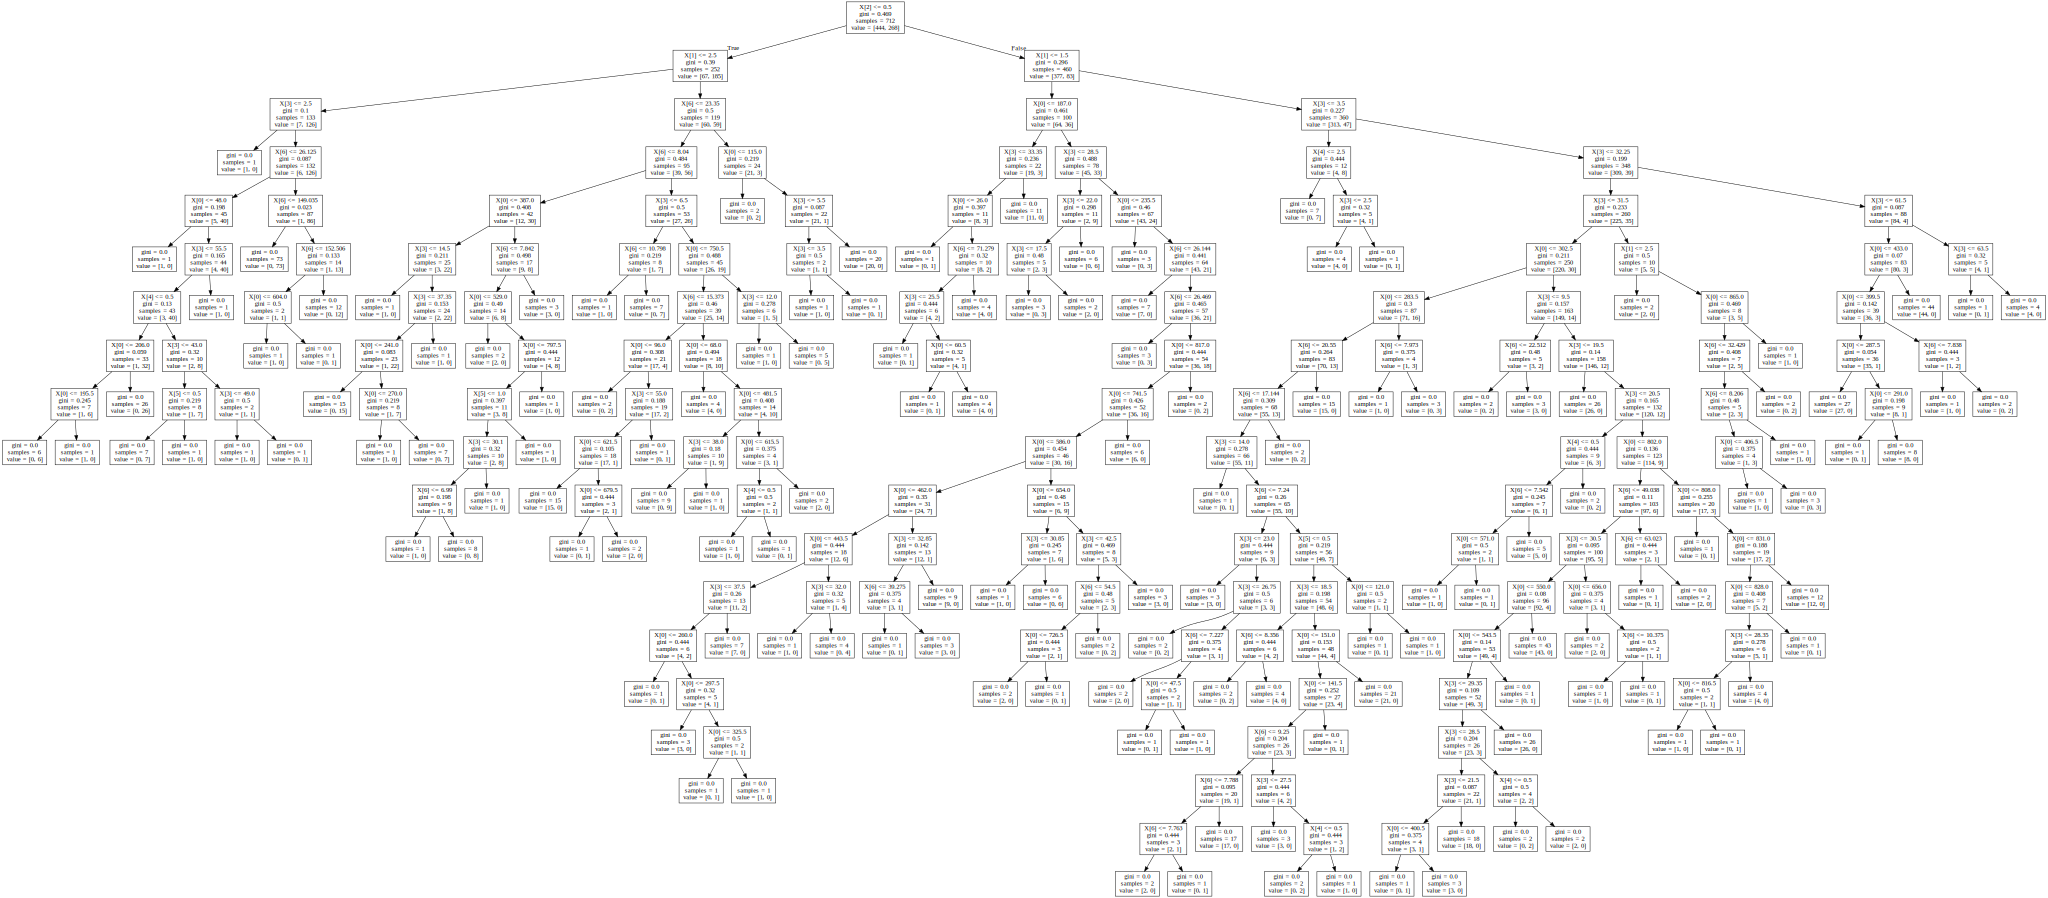

In [ ]:
graph = graphviz.Source(dot_data) 
graph